<a href="https://colab.research.google.com/github/Diechi09/AI-Machine-Learning-Foundations/blob/main/assignment1_diegooliveros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Diechi09/AI-Machine-Learning-Foundations/tree/main


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/MLClass/titanic3.xls"
df = pd.read_excel(file_path)

print("First 3 rows:")
print(df.head(3))

df.info()
print(df.describe())

#pd.read_excel("titanic3.xls")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 3 rows:
   pclass  survived                            name     sex      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   
2       1         0    Allison, Miss. Helen Loraine  female   2.0000      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   
2      2  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ---

The pandas library is a python based library that is commonly used in data analysis, extremely helpful when having to deal with dataframes, while matplotlib and seaborn are two very useful libraries to plot and graph data easily in python, very strong tool for data analysis.

Also imported Drive as that is where the excel dataset was downloaded and it was necessary to access it directly from there, the file can also be directly imported into the notebook if needed

The drive mount is necessary where you will give access to the google drive that will contain the file, and the file path is how to navigate through MY GOOGLE DRIVE and access the file. The read_excel pandas command does exactly what it says and reads the dataset and then we assign it the name of df (short for DataFrame)

Quickly show the first 3 columns to check all works well and then use 2 powerful commands in info and describe that will give us information about our dataframe, some crucial statistics and data for understanding

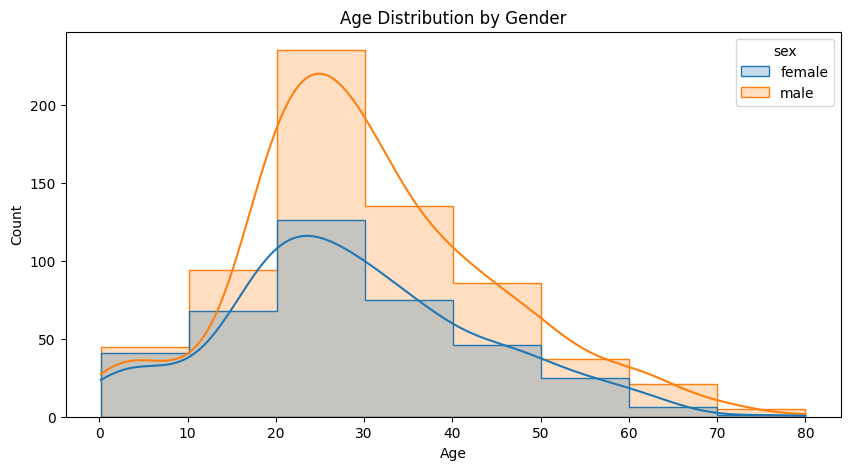

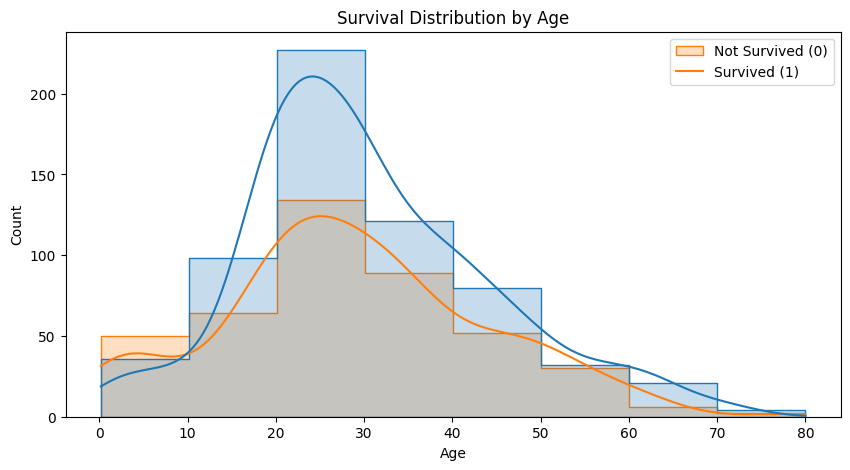

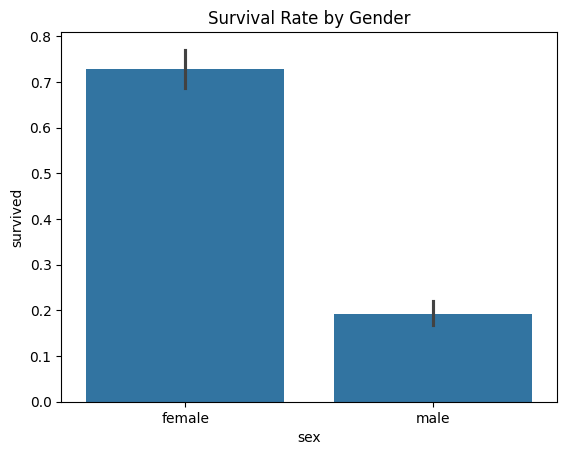

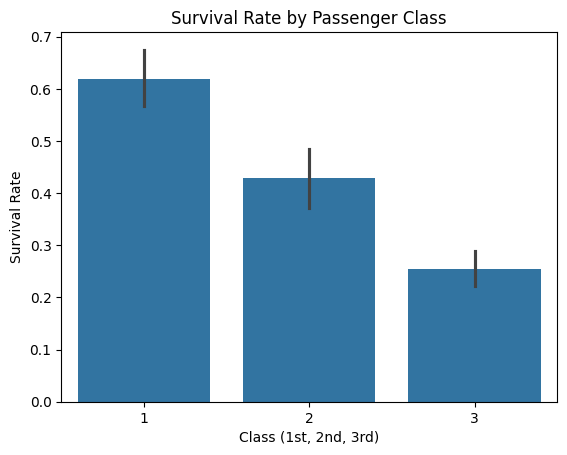

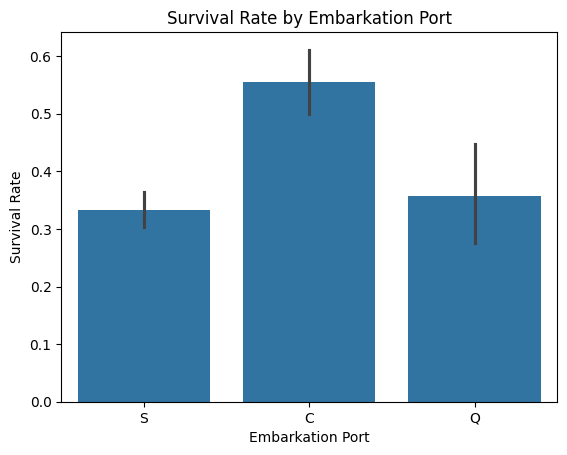

Average ticket fare: $33.30
Percentage of dead bodies found: 14.96%


In [2]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="sex", bins=8, kde=True, element="step", common_norm=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="survived", bins=8, kde=True, element="step", common_norm=False)
plt.title("Survival Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Not Survived (0)", "Survived (1)"])
plt.show()

sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class (1st, 2nd, 3rd)")
plt.ylabel("Survival Rate")
plt.show()

sns.barplot(x="embarked", y="survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

avg_fare = df.fare.mean()
print(f"Average ticket fare: ${avg_fare:.2f}")

total_deaths = df[df["survived"] == 0].shape[0]
bodies_found = df["body"].notna().sum()
recovery_rate = (bodies_found / total_deaths) * 100
print(f"Percentage of dead bodies found: {recovery_rate:.2f}%")


A way to explore and understand the dataset better is to play around with it and wrapp your head around some of the data that you are dealing with.

The column we are focusing on during this model is whether a passanger survived or not based on whatever information, and these plots all help me make an idea or quick eye checks on hypotheses on the matter

*   First plot helps to familiarize with the gender and age distribution throughout the datates, separated into 8 bins because I divided ages in groups of 10 years each with the oldest being 80

*   Second Plot helps me understand the survival rate correlation with age and gender, something I explore upon again with the 3rd picture

*   Another interesting thought was the priority between higher and lower classes while evacuating, as well as if where passangers embarked on, as these are two factors that could affect where they are placed on the boat, their experience on it and even the way they are treated by staff



In [3]:
df.cabin.fillna('Unknown', inplace=True)
df['home.dest'].fillna('Unknown', inplace=True)
df.boat.fillna('None', inplace=True)
df.body.fillna(-1, inplace=True)

print("Missing Values after Constant Imputation:")
print(df.isnull().sum())


Missing Values after Constant Imputation:
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin          0
embarked       2
boat           0
body           0
home.dest      0
dtype: int64


<ipython-input-3-c0da3a971255>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.cabin.fillna('Unknown', inplace=True)
<ipython-input-3-c0da3a971255>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

When doing EDA, clean and complete data is a must so I used this command to figure out which of our columns were missing values which we would have to deal with in some way, whether is dropping values or having to do imputation on them

Measure or Precision imputations are normally done after splitting the dataset into the different parts to avoid data leakage. However these columns are being dealt with Label imputation, so a constant is added to any cell in the column that needs it therefore not affecting if its done after or before



1.   NA Cabins were filled with Unknown
2.   NA Home Destination were filled with Unknown
3.   NA Boat were filled with None (assume they did not ride a boat)
4.   NA Body were filled with -1 (assume body was not found)



In [4]:
#Extract Titles from Names.
import re

def extract_title(name):
    title_search = re.search(r',\s*([^\.]+)\.', name)
    if title_search:
        return title_search.group(1).strip()
    return "Unknown"

df['title'] = df['name'].apply(extract_title)
print("Title counts:")
print(df['title'].value_counts())

#Family Size.
df['family_size'] = df['sibsp'] + df['parch'] + 1
print("First 5 rows of family size feature:")
print(df[['sibsp', 'parch', 'family_size']].head())

#Extract Deck from Cabin without using lambda functions.
def extract_deck(cabin):
    if isinstance(cabin, str) and cabin != 'Unknown':
        return cabin[0]
    else:
        return 'Unknown'

df['deck'] = df['cabin'].apply(extract_deck)
print("Deck distribution:")
print(df['deck'].value_counts())


Title counts:
title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64
First 5 rows of family size feature:
   sibsp  parch  family_size
0      0      0            1
1      1      2            4
2      1      2            4
3      1      2            4
4      1      2            4
Deck distribution:
deck
Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: count, dtype: int64


I decided to do 3 new columns with Feature engineering that I believed would help me with my model


### 1.   Taking the Title in the Names

*   The name of a person itself gives no indication to them dying or not, while a title can give more indication as it can further indicate gender, age and status
*   Can potentially lead to some bigger connections like Mrs normally implying a woman is married and has a family



### 2.   Calculating Family Size

*   Family can affect the survival of a person in different ways, maybe if they had children they would rather save them, or if somebody had a big family coordination issues during emergency are more prominent and they all die
*   This also grabs two features we already had in sibsp and parch and joins them to make a better one

### 3.    Taking the Deck from Cabins

*   Gives us an idea of the area a passanger was located on the boat which can significantly affect their survival chances, and maybe patterns with certain decks
*   Instead of having unique cabins, its better to reduce to areas as the difference wont be much







In [5]:
drop_cols = ['name', 'ticket', 'cabin', 'boat', 'home.dest']
df_model = df.drop(columns=drop_cols)

X = df_model.drop('survived', axis=1)
y = df_model['survived']

print("Columns for modeling:")
print(X.columns.tolist())


Columns for modeling:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'body', 'title', 'family_size', 'deck']


In this step, I did a final cleanup to get rid of the columns which I believed to be for now irrelevant towards figuring out if a passanger survived or not

1.   Name - doesnt provide any correlation to survival
2.   Ticket - unique random numbers that mean nothing for survival
3.   Cabin - A more redundant version of our new 'deck'
4.   Boat - If you got on a boat you survived, with a lot of missing data at the beginning it seems best to leave it out
5.   Home Dest - Too many unique answers with no correlation whatsover



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (916, 11) (916,)
Validation set shape: (196, 11) (196,)
Test set shape: (197, 11) (197,)


The split is finally done in this step, we take the training set to be 70% of our set and then further split the las 30% into equal 15% parts in a validation set and a test set. These sets will help us later to see if our final model will be truly viable in a real world scenario, because if we just train it on our data, it might seem like a good model but it will be dataset specific and we wouldve made a useless model

In [ ]:
age_mean = X_train['age'].mean()
fare_mean = X_train['fare'].mean()
embarked_mode = X_train['embarked'].mode()[0]

X_train['age'] = X_train['age'].fillna(age_mean)
X_train['fare'] = X_train['fare'].fillna(fare_mean)
X_train['embarked'] = X_train['embarked'].fillna(embarked_mode)

X_val['age'] = X_val['age'].fillna(age_mean)
X_val['fare'] = X_val['fare'].fillna(fare_mean)
X_val['embarked'] = X_val['embarked'].fillna(embarked_mode)

X_test['age'] = X_test['age'].fillna(age_mean)
X_test['fare'] = X_test['fare'].fillna(fare_mean)
X_test['embarked'] = X_test['embarked'].fillna(embarked_mode)

After splitting we can finally add the Measure imputations for the statistical and numerical columns with missing data.


*   Used the mean best thing here is the mean of all passangers
*   Used the mean for fare as the ticket prices we just want an average as most people will get around the same
*   Used mode for embarked port as its not numbers and the best practice here is to assume most people gor on the most popular place


In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_cols = ['sex', 'embarked', 'title', 'deck']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numeric_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


Categorical columns: ['sex', 'embarked', 'title', 'deck']
Numerical columns: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'body', 'family_size']


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


We scale our numeric features using StandardScaler such that each feature has a mean of 0 and stddev of 1, making sure that a feature doesn’t dominate over others during learning. The OneHotEncoder also converts our categorical features (sex, embarked, title, and deck) into binary columns that the model understands without suggesting a natural order. This can be done by combining these steps in a ColumnTransformer that you fit on your training set only and apply to your validation and test set, avoiding data leakage.

Using standardization was a better alternative than normalization for my model so I took this route

In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)


unique, counts = np.unique(y_train_balanced, return_counts=True)
print("Balanced class distribution:", dict(zip(unique, counts)))


Balanced class distribution: {0: 566, 1: 566}


We use the method of SMOTE here as it observes the minority class instanceand  creates new examples by interpolating within existing ones. This ensures that the model does not lean more towards the majority class and then under-performs on the minority class.

I selected SMOTE as opposed to ADASYN, because SMOTE works better with more moderate class imbalance, like the one we have here meanwhile ADASYN varies the amount of oversampling based on local density and can lead to more issues with stuff like noise

In [10]:
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)


variances = X_train_df.var().sort_values(ascending=False)
print("Variance for each feature:")
print(variances)

corr_matrix = X_train_df.corr().abs()

import numpy as np
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_threshold = 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > high_corr_threshold)]
print("Features to drop due to high correlation:", to_drop)

X_train_reduced = X_train_df.drop(columns=to_drop)
print("Reduced training set shape:", X_train_reduced.shape)


Variance for each feature:
num__body            1.001093
num__parch           1.001093
num__sibsp           1.001093
num__age             1.001093
num__fare            1.001093
num__family_size     1.001093
num__pclass          1.001093
cat__title_Mr        0.243014
cat__sex_male        0.227221
cat__embarked_S      0.215385
cat__deck_Unknown    0.171469
cat__title_Miss      0.156063
cat__title_Mrs       0.127333
cat__embarked_Q      0.091320
cat__deck_C          0.065997
cat__deck_B          0.046764
cat__title_Master    0.045778
cat__deck_D          0.036790
cat__deck_E          0.029666
cat__deck_F          0.008667
cat__title_Rev       0.006514
cat__title_Dr        0.005435
cat__deck_G          0.003268
cat__title_Col       0.003268
cat__title_Mlle      0.002181
cat__title_Ms        0.002181
cat__title_Don       0.001092
cat__title_Major     0.001092
cat__title_Dona      0.001092
cat__deck_T          0.001092
dtype: float64
Features to drop due to high correlation: []
Reduced train

This step is called feature selection, where we see the different variances and multicorrelation in our different features that can then lead us to make decisions if we want to keep them or drop them


*   It is a good step as sometimes not dropping some features can hinder the performance of a model
*   But it also goes both ways, were keeping a feature might actually be worse for the model

Threshold is high to ensure that what we are dropping makes sense to drop and that the multicollinearity actually exists withing a pair



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.7923550738762621


We train a simple Logistic Regression model on our balanced training data and evaluate it on both validation and test sets. This basic model is our starting point—it's easy to interpret and shows how well our preprocessing (imputation, scaling, encoding, and balancing) is working.

In [12]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

y_val_rf = rf.predict(X_val_processed)
print("Random Forest Validation Report:\n", classification_report(y_val, y_val_rf))


Random Forest Validation Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       121
           1       0.73      0.80      0.76        75

    accuracy                           0.81       196
   macro avg       0.80      0.81      0.80       196
weighted avg       0.82      0.81      0.81       196



Here, we try a Random Forest, which builds many decision trees and averages their predictions. It’s interesting because it can capture complex, non-linear relationships that a simple model might miss, giving us an idea if a more complex approach could perform better.

In [13]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

y_val_xgb = xgb_model.predict(X_val_processed)
print("XGBoost Validation Report:\n", classification_report(y_val, y_val_xgb))


XGBoost Validation Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       121
           1       0.72      0.79      0.75        75

    accuracy                           0.80       196
   macro avg       0.79      0.80      0.79       196
weighted avg       0.81      0.80      0.80       196



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


This cell uses XGBoost, a powerful boosting algorithm that builds trees sequentially to correct previous errors. It’s popular for its high accuracy on structured data and helps us see whether boosting methods can further improve our predictions.

In [14]:
#Cross-Validation with the Best Logistic Regression Model
from sklearn.model_selection import cross_val_score

best_lr = grid_search.best_estimator_
cv_scores = cross_val_score(best_lr, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.78854626 0.85022026 0.75663717 0.80088496 0.76548673]
Mean CV score: 0.7923550738762621


Validation Accuracy: 0.8367346938775511
Confusion Matrix (Validation):
 [[100  21]
 [ 11  64]]
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       121
           1       0.75      0.85      0.80        75

    accuracy                           0.84       196
   macro avg       0.83      0.84      0.83       196
weighted avg       0.84      0.84      0.84       196



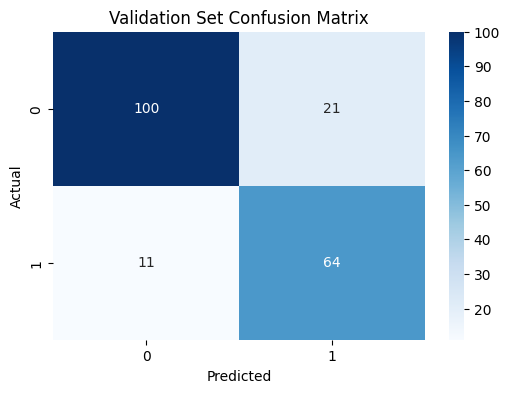

Test Accuracy: 0.8071065989847716
Confusion Matrix (Test):
 [[95 27]
 [11 64]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       122
           1       0.70      0.85      0.77        75

    accuracy                           0.81       197
   macro avg       0.80      0.82      0.80       197
weighted avg       0.82      0.81      0.81       197



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

final_model = grid_search.best_estimator_
final_model.fit(X_train_balanced, y_train_balanced)

y_val_pred = final_model.predict(X_val_processed)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Validation Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_test_pred = final_model.predict(X_test_processed)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


We use cross-validation on our best Logistic Regression model to ensure that our performance is consistent across different splits of the data. This gives us a more reliable estimate of how well the model will generalize to new data.

We see our final model has an 80% accuracy